In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [5]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
#removal of empty spaces in column name
data.columns=data.columns.str.rstrip()
data.columns=data.columns.str.lstrip()

In [7]:
#shape of the data
data.shape

(39644, 61)

In [8]:
#information about data types of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [6]:
#checking for null values
data.isna().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [7]:
#statistical information of the features
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [8]:
#correlation between features and heat map

data.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


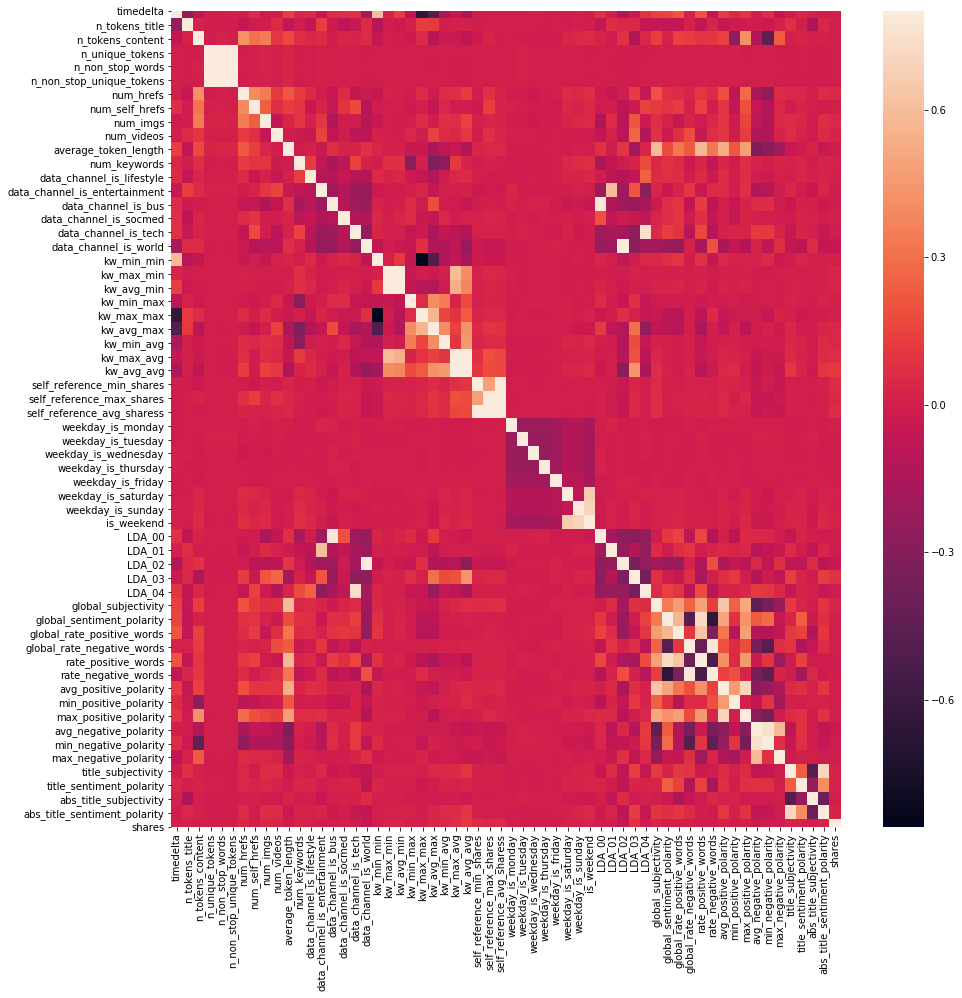

In [9]:

fig = plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), vmax = .8)
plt.show()

In [10]:
data.drop('url',axis=1,inplace=True)

### Univariate Analysis

#### 1.n_tokens_title

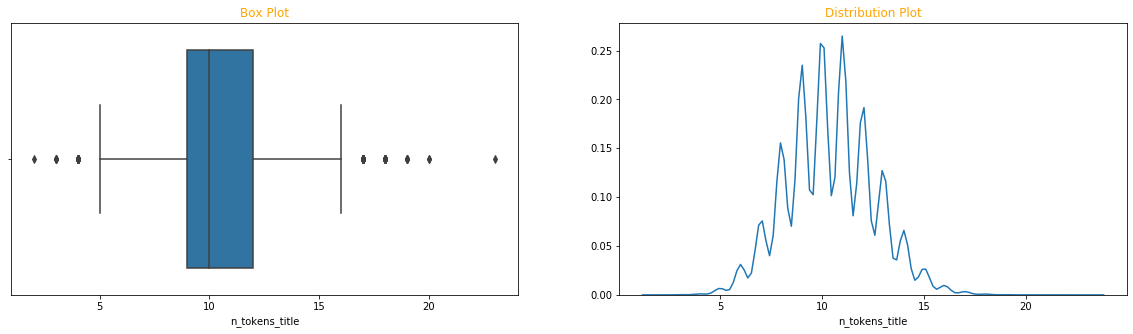

In [11]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['n_tokens_title'],ax=axes[0])
sns.distplot(data['n_tokens_title'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 2.n_tokens_content

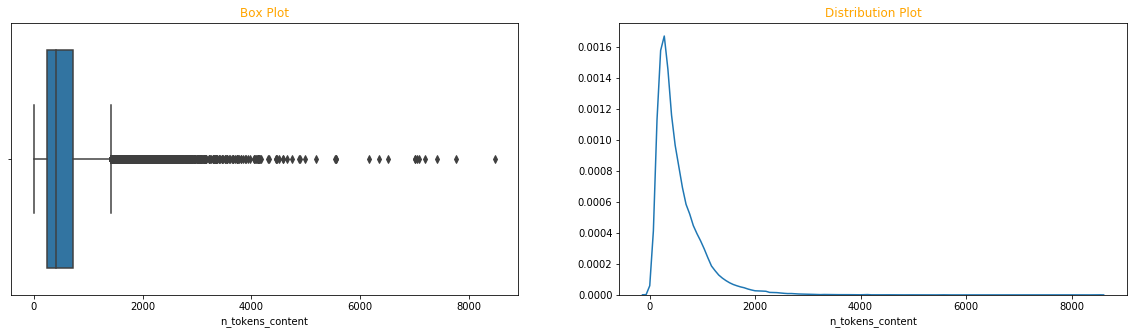

In [12]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['n_tokens_content'],ax=axes[0])
sns.distplot(data['n_tokens_content'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 3.n_unique_tokens

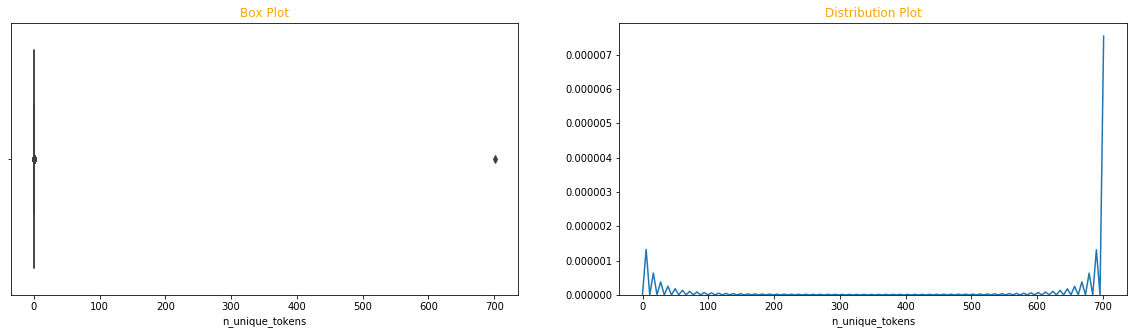

In [13]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['n_unique_tokens'],ax=axes[0])
sns.distplot(data['n_unique_tokens'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 4.kw_avg_avg

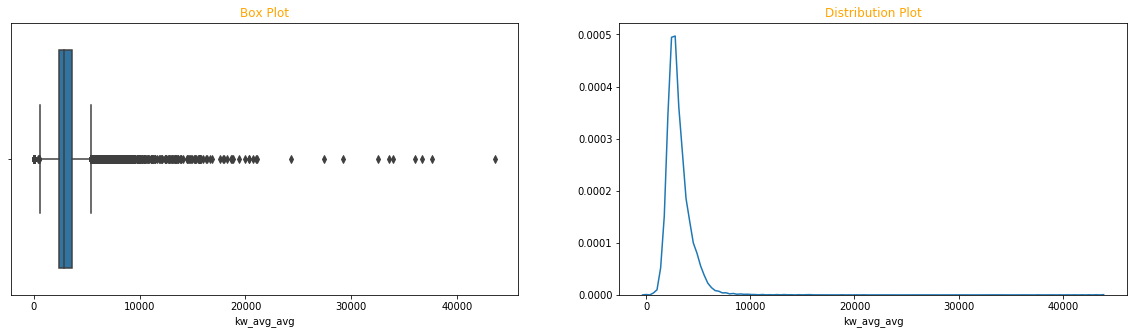

In [14]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['kw_avg_avg'],ax=axes[0])
sns.distplot(data['kw_avg_avg'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 5.self_reference_avg_sharess

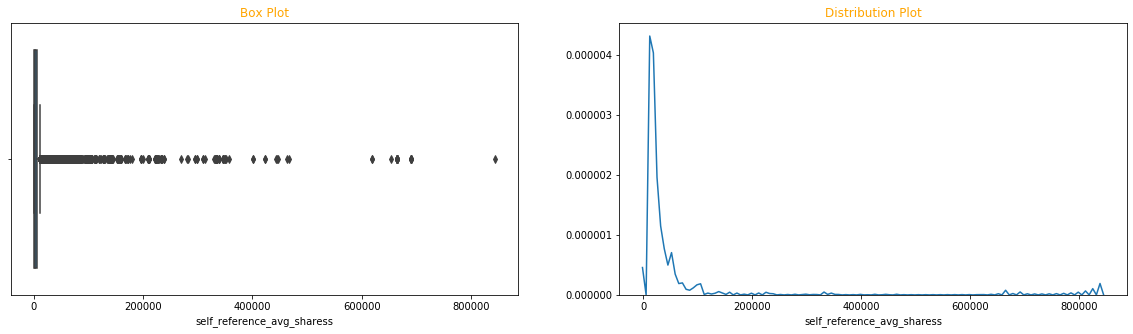

In [15]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['self_reference_avg_sharess'],ax=axes[0])
sns.distplot(data['self_reference_avg_sharess'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 6.avg_positive_polarity

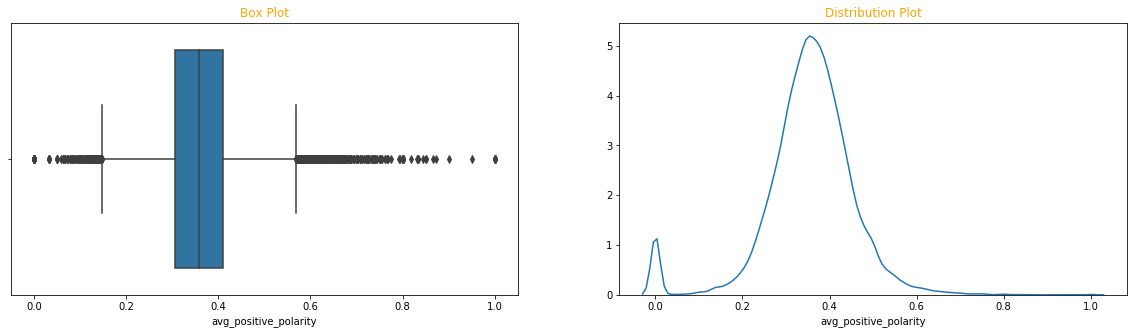

In [16]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['avg_positive_polarity'],ax=axes[0])
sns.distplot(data['avg_positive_polarity'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 7.avg_negative_polarity

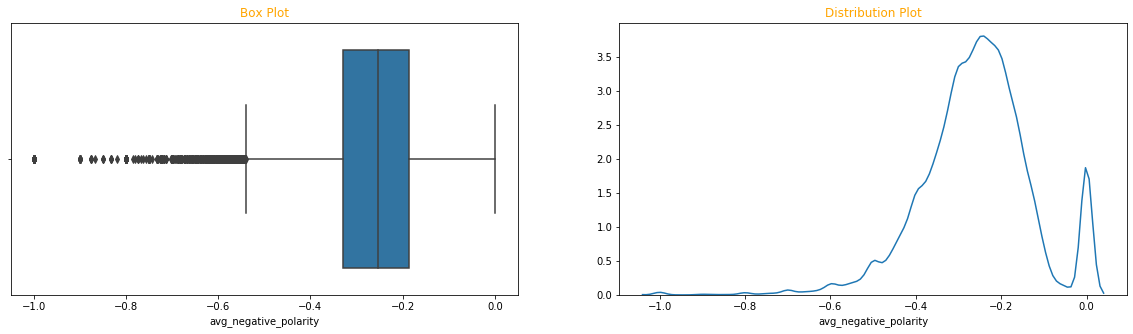

In [17]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['avg_negative_polarity'],ax=axes[0])
sns.distplot(data['avg_negative_polarity'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 8.abs_title_subjectivity

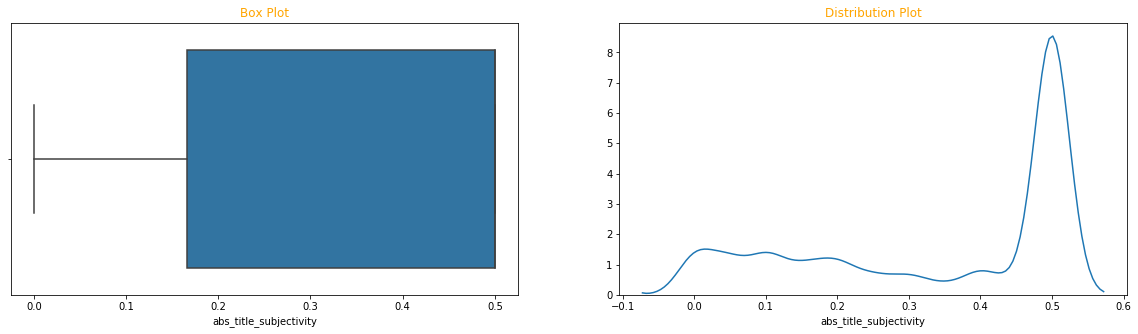

In [18]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['abs_title_subjectivity'],ax=axes[0])
sns.distplot(data['abs_title_subjectivity'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 9. Articles Published per Day

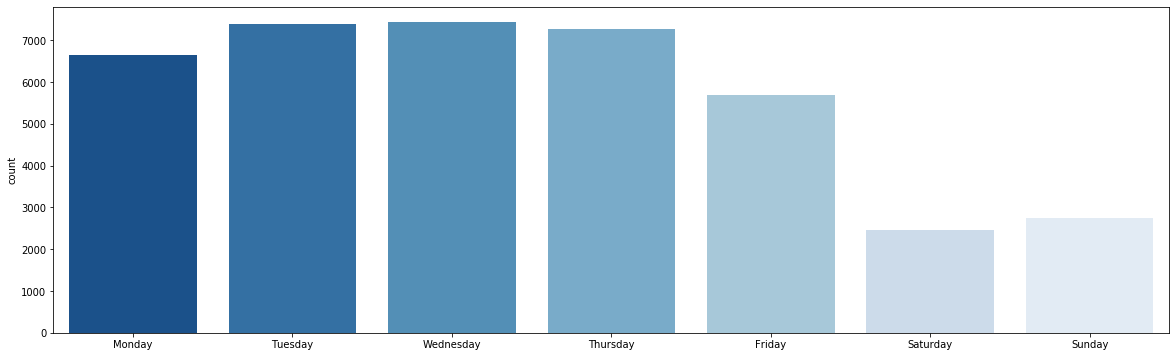

In [19]:
weekday = pd.get_dummies(data[['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']]).idxmax(1)
weekday.replace({'weekday_is_monday' :'Monday',
'weekday_is_tuesday':'Tuesday',
'weekday_is_wednesday':'Wednesday',
'weekday_is_thursday':'Thursday',
'weekday_is_friday':'Friday',
'weekday_is_saturday':'Saturday',
'weekday_is_sunday':'Sunday'} , inplace = True)
plt.figure(figsize=(20,6))
sns.countplot(weekday, palette = "Blues_r")
plt.show()

#### 10.Articles published per Channel.

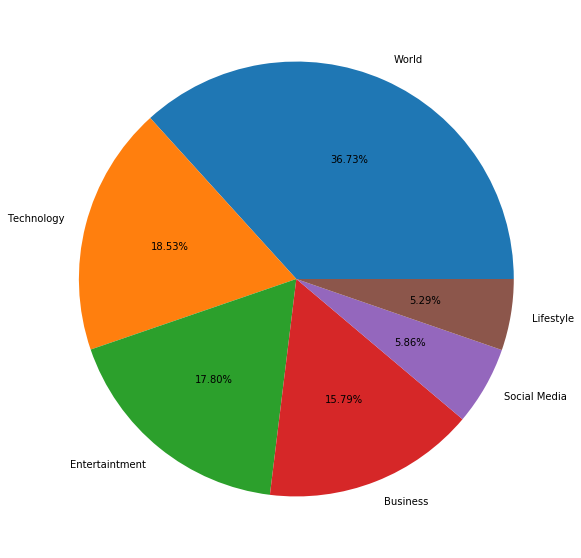

In [20]:
data['data_channel_is_lifestyle'].replace(to_replace=1,value=1,inplace=True)
data['data_channel_is_entertainment'].replace(to_replace=1,value=2,inplace=True)
data['data_channel_is_bus'].replace(to_replace=1,value=3,inplace=True)
data['data_channel_is_socmed'].replace(to_replace=1,value=4,inplace=True)
data['data_channel_is_tech'].replace(to_replace=1,value=5,inplace=True)
data['data_channel_is_world'].replace(to_replace=1,value=0,inplace=True)

data['channel']=data.apply(lambda row:row['data_channel_is_lifestyle']+row['data_channel_is_entertainment']
                    +row['data_channel_is_bus']+row['data_channel_is_socmed']+row['data_channel_is_tech']
                    +row['data_channel_is_world'],axis=1)

data['channel'].replace({1:'Lifestyle',2:'Entertaintment',3:'Business',4:'Social Media',5:'Technology',0:'World'},inplace=True)

fig = plt.figure(figsize = (15,10))
plt.pie(data['channel'].value_counts(),labels=data['channel'].value_counts().index,autopct='%1.2f%%')
plt.show()

#### 11.Title_sentiment_polarity

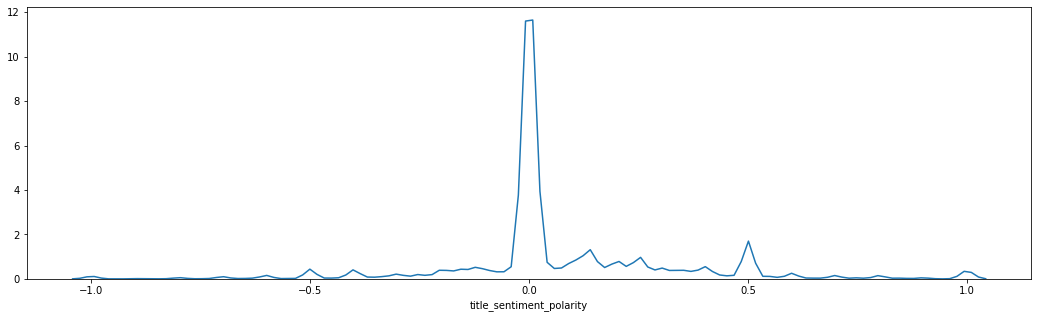

In [21]:
plt.subplots(1,1,figsize=(18,5))
sns.distplot(data['title_sentiment_polarity'],hist=False)
plt.show()

#### 12.Shares

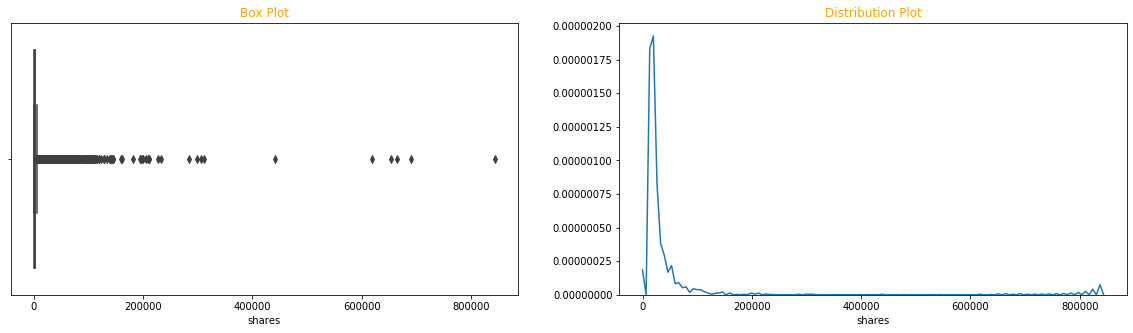

In [22]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['shares'],ax=axes[0])
sns.distplot(data['shares'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

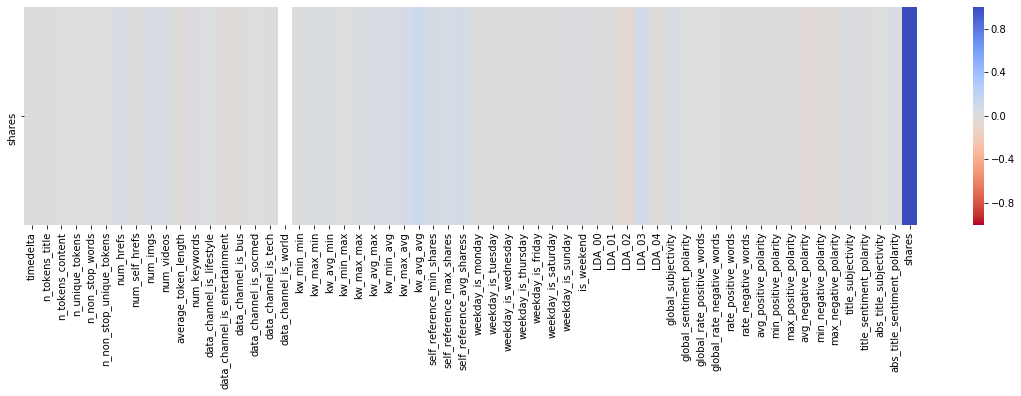

In [23]:
plt.figure(figsize=(20,4))
sns.heatmap(data.corr().loc[['shares'],:] ,cmap="coolwarm_r",vmin = -1, vmax= 1)
plt.show()

In [24]:
abs(data.corr()["shares"]).sort_values().tail(10)

num_hrefs                     0.045404
self_reference_max_shares     0.047115
self_reference_min_shares     0.055958
self_reference_avg_sharess    0.057789
LDA_02                        0.059163
kw_max_avg                    0.064306
LDA_03                        0.083771
kw_avg_avg                    0.110413
shares                        1.000000
data_channel_is_world              NaN
Name: shares, dtype: float64

### Bivariate Analysis

#### Title Tokens vs Shares

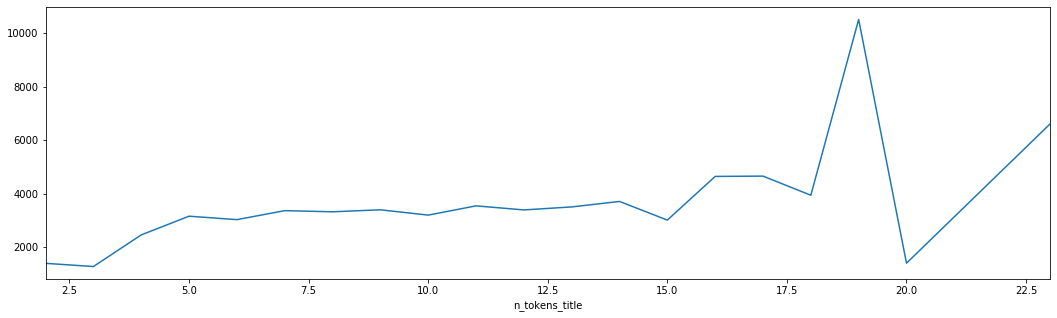

In [25]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('n_tokens_title').mean()['shares'].plot(kind='line')
plt.show()

#### No of Tokens vs Shares

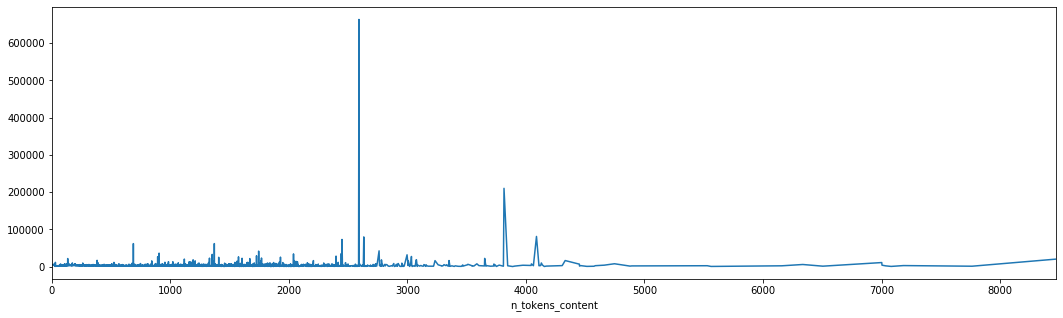

In [26]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('n_tokens_content').mean()['shares'].plot(kind='line')
plt.show()

#### No of Images vs Shares

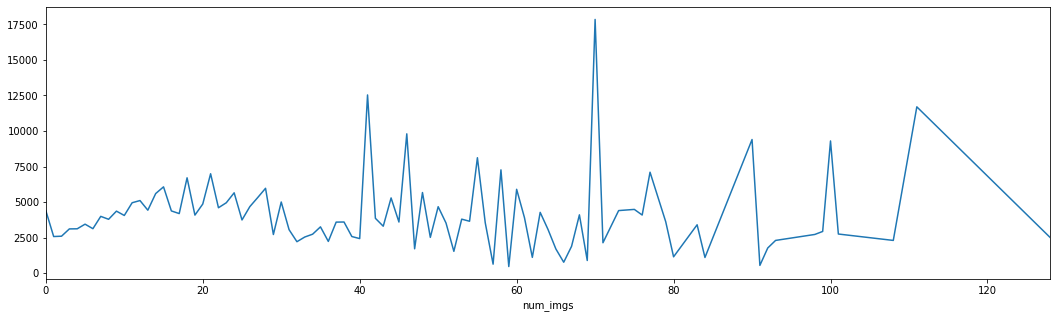

In [27]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_imgs').mean()['shares'].plot(kind='line')
plt.show()

#### No of Videos vs Shares

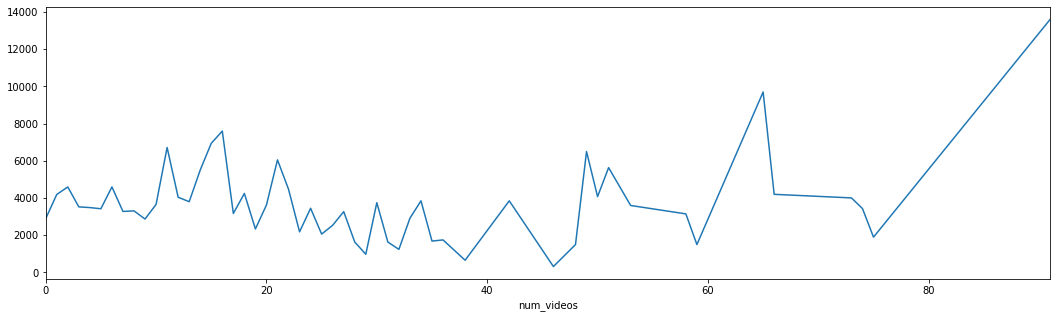

In [28]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_videos').mean()['shares'].plot(kind='line')
plt.show()

#### No of Referenced Links vs Shares

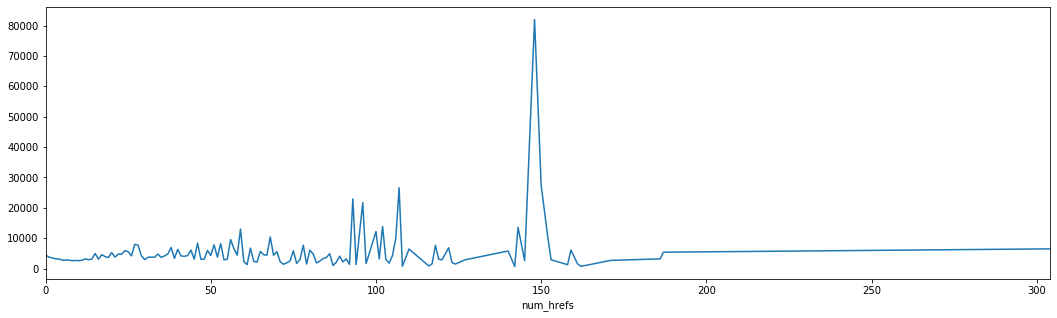

In [29]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_hrefs').mean()['shares'].plot(kind='line')
plt.show()

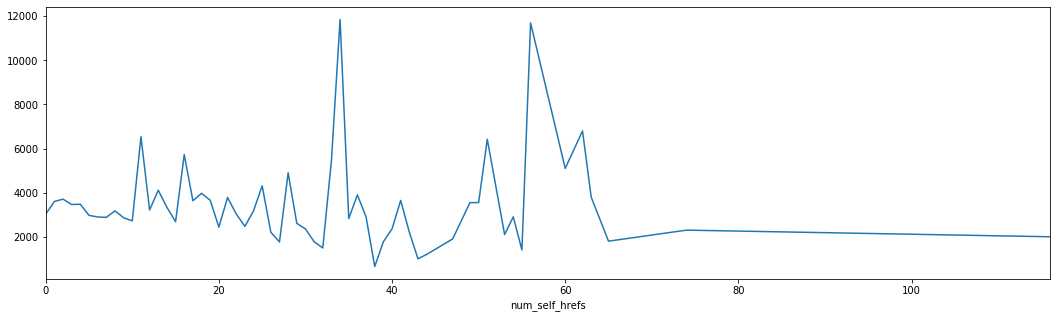

In [30]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_self_hrefs').mean()['shares'].plot(kind='line')
plt.show()

#### No. of Keywords vs Shares

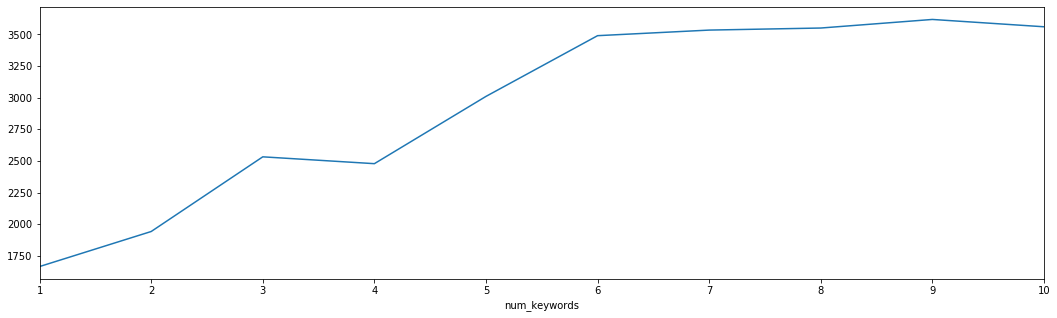

In [31]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_keywords').mean()['shares'].plot(kind='line')
plt.show()

#### Sentiment Polarity vs Shares

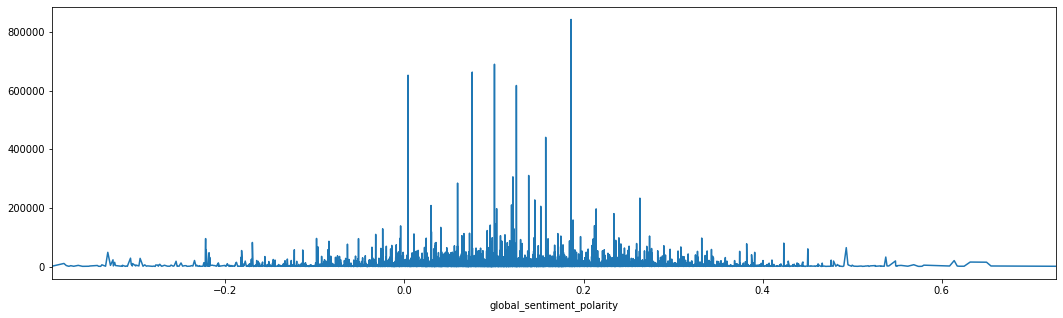

In [32]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('global_sentiment_polarity').mean()['shares'].plot(kind='line')
plt.show()

#### Rate of Negative Words vs Shares

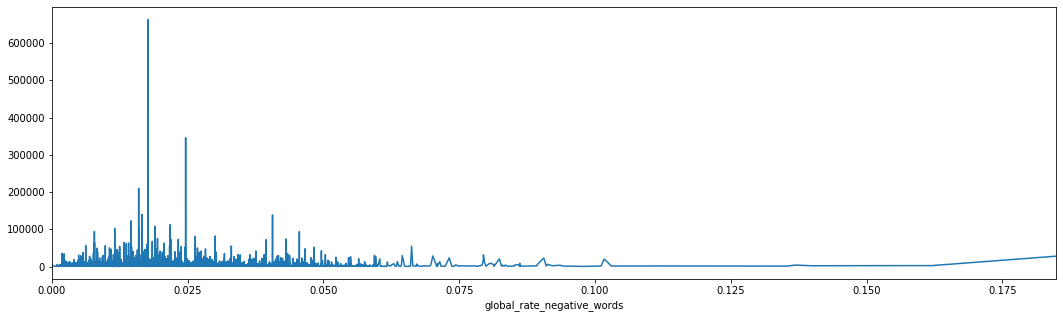

In [33]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('global_rate_negative_words').mean()['shares'].plot(kind='line')
plt.show()

#### Average Token Length vs Shares

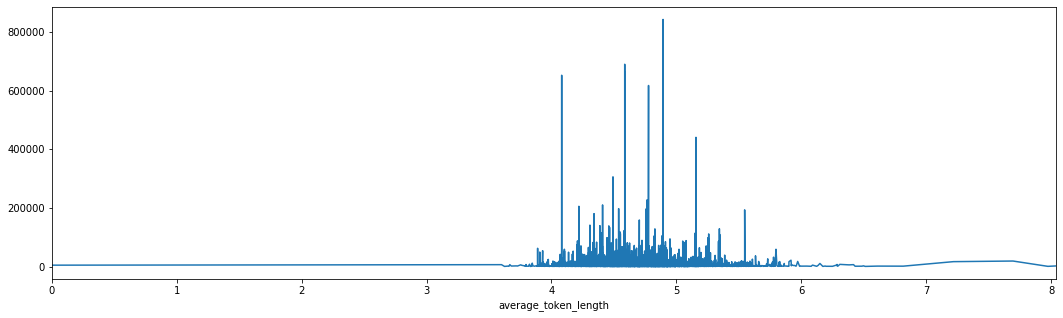

In [34]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('average_token_length').mean()['shares'].plot(kind='line')
plt.show()

### ------------------------------------------------------------------- END OF EDA--------------------------------------------------------------------------

In [11]:
#initializing the data
data1 = pd.read_csv("OnlineNewsPopularity.csv")
data1.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [12]:
#removal of empty spaces in column name
data1.columns=data1.columns.str.rstrip()
data1.columns=data1.columns.str.lstrip()

In [13]:
data1.drop('url',axis=1,inplace=True)

#### Data Cleaning-Removal of Outliers

In [14]:
#creating a function to check outlier percentage
def outlier_per(col):
    values=col
    q1=np.quantile(values,0.25)
    q3=np.quantile(values,0.75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    per=((len(values[values>ul])+len(values[values<ll]))/len(values))*100
    return(ul,ll,per)

In [15]:
#creating a function to check outlier percentage after transforming
def outliers_det(col):
    values=col
    #print('Outlier Detection:')
    ul,ll,per=outlier_per(values)
    log_values=np.log1p(values)
    ull,lll,perl=outlier_per(log_values)
    #print('Outlier Percentage after log transformation:',perl)
    root_values=np.sqrt(values)
    uls,lls,pers=outlier_per(root_values)
    #print('Outlier Percentage after sqrt transformation:',pers)
    rem_values=values[(values<ul) & (values>ll)]
    if len(rem_values)>0:
        ulr,llr,perr=outlier_per(rem_values)
        #print('Outlier Percentage after removal:',perr)
    else:
        #print('No remaining values')
        perr='No Values'
    return(per,perl,pers,perr)

In [16]:
#running a for loop through all the columns to find the outlier percent by the above function.
print('Outlier detection of all the columns:\n')
column_name=[]
per_list=[]
perl_list=[]
pers_list=[]
perr_list=[]
for i in data1.columns:
    if ('weekday' not in i) and ('weekend' not in i) and ('data_channel' not in i):
        per,perl,pers,perr=outliers_det(data1[i])
        column_name.append(i)
        per_list.append(per)
        perl_list.append(perl)
        pers_list.append(pers)
        perr_list.append(perr)
out_det_df=pd.DataFrame({'Column Name':column_name,'Before Transformation':per_list,
                         'After Log Transformation':perl_list,
                        'After Square Root Transformation':pers_list,'After removal':perr_list})
out_det_df

Outlier detection of all the columns:



,Column Name,Before Transformation,After Log Transformation,After Square Root Transformation,After removal
0,timedelta,0.000000,2.353446,0.000000,0
1,n_tokens_title,0.393502,0.572596,0.628090,0
2,n_tokens_content,4.875895,3.291797,2.010392,1.81929
3,n_unique_tokens,4.046009,3.866916,3.935022,0.260252
4,n_non_stop_words,7.130966,7.130966,7.130966,2.00179
5,n_non_stop_unique_tokens,4.371406,4.459691,4.505095,0.429954
6,num_hrefs,5.471194,0.335486,2.313086,2.81252
7,num_self_hrefs,5.271920,1.218343,2.282817,0
8,num_imgs,19.430431,5.952982,11.530118,43.2735
9,num_videos,7.431137,5.483806,4.815357,0


In [17]:
#creating a function treat the outliers whichever transformation/removal is effective
def outliers_treating(df,col):
    #print('Outlier Treating:')
    values=df[col]
    ul,ll,per=outlier_per(values)
    #print('Outlier Percentage before transformation:',per)
    log_values=np.log1p(values)
    ull,lll,perl=outlier_per(log_values)
    root_values=np.sqrt(values)
    uls,lls,pers=outlier_per(root_values)
    rem_values=values[(values<ul) & (values>ll)]
    if len(rem_values)>0:
        ulr,llr,perr=outlier_per(rem_values)
    neg_counter=0    
    for i in values:
        if i<0:
            neg_counter+=1
    if per>0:
        min_treatment=np.min([pers,perl])
        min_treatment_arg=np.argmin([pers,perl])
        treated_values=[root_values,log_values]
        transformation=['Square Root Transformation','Log (X+1) transformation']
        if ((per-min_treatment)/per)>0.2 and neg_counter==0:
            new_values=treated_values[min_treatment_arg]
            #print('Transformation done:',transformation[min_treatment_arg])
            trans_name=transformation[min_treatment_arg]
            df[col]=new_values
        else:
            if len(rem_values)>0:
                if per<5 and ((per-perr)/per)>=0.7:
                    df=df[(df[col]<ul) & (df[col]>ll)]
                    #print('Transformation done:','Removed Outliers since it is less than 5%')
                    trans_name='Removal'
                else:
                    #print('Transformation done:','No transformation is effective or large loss of data')
                    trans_name='NO transformation/removal is effective.'
            else:
                    #print('No values after removing. No transformation done.')
                    trans_name='NO transformation/removal is effective.'
    else:
        trans_name='No need for transformation.'
    return(df,trans_name)

In [18]:
df_ot=data1.copy()
print('Outlier detection of all the columns:\n')
column_name=[]
trans_list=[]
for i in df_ot.columns:
    if ('weekday' not in i) and ('weekend' not in i) and ('data_channel' not in i):
        df_ot,trans_name=outliers_treating(df_ot,i)
        column_name.append(i)
        trans_list.append(trans_name)
out_det_treat=pd.DataFrame({'Column Name':column_name,'Transformation Done':trans_list})
out_det_treat

Outlier detection of all the columns:



,Column Name,Transformation Done
0,timedelta,No need for transformation.
1,n_tokens_title,Removal
2,n_tokens_content,Square Root Transformation
3,n_unique_tokens,Removal
4,n_non_stop_words,Removal
5,n_non_stop_unique_tokens,Removal
6,num_hrefs,Log (X+1) transformation
7,num_self_hrefs,Log (X+1) transformation
8,num_imgs,Log (X+1) transformation
9,num_videos,Square Root Transformation


### Statistical Analysis of Dataset

####  Loading the dataset which is outlier treated by the above process.

In [203]:
df=pd.read_csv('ONP Outlier Treated.csv')
df.head()

,Unnamed: 0,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,731.0,12.0,14.798649,0.663594,1.0,0.815385,1.609438,1.098612,0.693147,...,0.316228,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.433013,6.386879
1,1,731.0,9.0,15.968719,0.604743,1.0,0.791946,1.386294,0.693147,0.693147,...,0.182574,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,6.568078
2,2,731.0,9.0,23.043437,0.503788,1.0,0.665635,2.302585,0.000000,0.693147,...,0.369274,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7.090910
3,3,731.0,13.0,32.741411,0.415646,1.0,0.540890,2.995732,2.995732,3.044522,...,0.182574,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.369274,6.226537
4,4,731.0,10.0,19.235384,0.559889,1.0,0.698198,1.098612,1.098612,0.000000,...,0.369274,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.462910,6.752270


In [204]:
df.drop('Unnamed: 0',1,inplace=True)

In [205]:
#removal of empty spaces in column name
df.columns=df.columns.str.rstrip()
df.columns=df.columns.str.lstrip()

#### Statiscal Significance between target column and independent variables

In [206]:
df.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [207]:
cat_cols=['data_channel_is_entertainment','data_channel_is_lifestyle','data_channel_is_bus',
         'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world',
         'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday',
         'weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
cont_cols=[]
for i in df.columns:
    if i not in cat_cols:
        cont_cols.append(i)
print('Categorical Columns:\n',cat_cols)
print('Continous Columns:\n',cont_cols)

Categorical Columns:
 ['data_channel_is_entertainment', 'data_channel_is_lifestyle', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']
Continous Columns:
 ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negativ

#### Performing the normality test of the target column before performing the statistical tests between indpendent and independent variables.

In [208]:
from scipy.stats import kstest

In [209]:
stat,pval=kstest(df['shares'],'norm')
print('Stat Value:',stat,'P Value:',pval)
if pval>0.05:
    print('Normal Distribution (Gaussian)')
else:
    print('Not Normal Distribution')

Stat Value: 0.9997662334628614 P Value: 0.0
Not Normal Distribution


<b>Since the Distribution of the target column is not normal, we need to perform only non paramteric tests.

In [210]:
from scipy.stats import kruskal

In [211]:
stat_list=[]
pval_list=[]
result=[]
for i in cat_cols:
    data1=df[df[i]==0]['shares']
    data2=df[df[i]==1]['shares']
    stat,pval=kruskal(data1,data2)
    stat_list.append(stat)
    pval_list.append(pval)
    if pval<0.05:
        result.append('Significant')
    else:
        result.append('Not Significant')
pd.DataFrame({'Column':cat_cols,'Stat Value':stat_list,'P Value':pval_list,'Significance':result})

,Column,Stat Value,P Value,Significance
0,data_channel_is_entertainment,384.445796,1.339850e-85,Significant
1,data_channel_is_lifestyle,59.399517,1.287007e-14,Significant
2,data_channel_is_bus,1.164061,2.806250e-01,Not Significant
3,data_channel_is_socmed,480.727108,1.484318e-106,Significant
4,data_channel_is_tech,416.826891,1.197063e-92,Significant
5,data_channel_is_world,958.156708,2.237093e-210,Significant
6,weekday_is_monday,10.455867,1.222605e-03,Significant
7,weekday_is_tuesday,54.041685,1.962810e-13,Significant
8,weekday_is_wednesday,60.081599,9.100518e-15,Significant
9,weekday_is_thursday,39.403854,3.446161e-10,Significant


<b>Performing Statistical Test for Continous Independent Variables and the Target Variable.

In [212]:
corr_vals=df[cont_cols].corr()
print(corr_vals['shares'])

timedelta                       0.038248
n_tokens_title                 -0.031780
n_tokens_content                0.032010
n_unique_tokens                -0.031134
n_non_stop_words                0.002068
n_non_stop_unique_tokens       -0.051209
num_hrefs                       0.115922
num_self_hrefs                  0.064189
num_imgs                        0.098580
num_videos                      0.061703
average_token_length           -0.064787
num_keywords                    0.069581
kw_min_min                      0.031956
kw_max_min                      0.033668
kw_avg_min                      0.042226
kw_min_max                      0.038681
kw_max_max                     -0.006205
kw_avg_max                      0.043711
kw_min_avg                      0.116028
kw_max_avg                      0.163650
kw_avg_avg                      0.187171
self_reference_min_shares       0.167511
self_reference_max_shares       0.158326
self_reference_avg_sharess      0.180348
LDA_00          

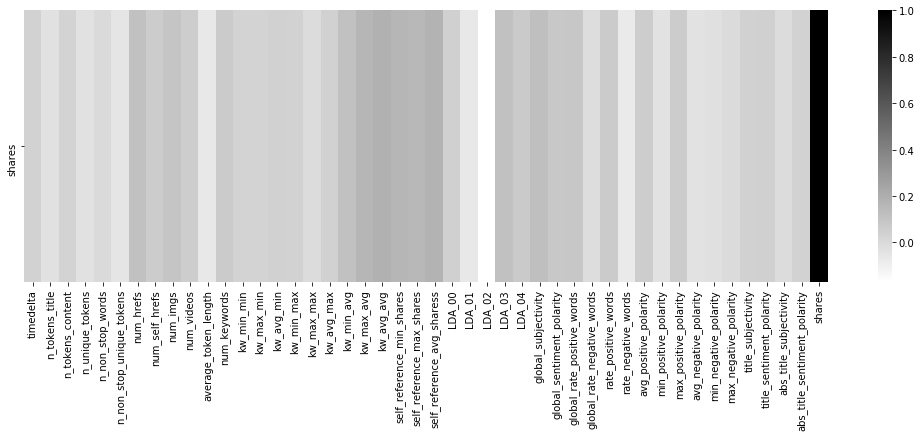

In [213]:
plt.subplots(1,1,figsize=(18,5))
sns.heatmap(corr_vals[['shares']].T,cmap='gray_r')
plt.show()

In [214]:
print('Top 10 positively correlated features:')
print(corr_vals['shares'].sort_values(ascending=False).head(10))

Top 10 positively correlated features:
shares                        1.000000
kw_avg_avg                    0.187171
self_reference_avg_sharess    0.180348
self_reference_min_shares     0.167511
kw_max_avg                    0.163650
self_reference_max_shares     0.158326
global_subjectivity           0.126159
kw_min_avg                    0.116028
num_hrefs                     0.115922
LDA_03                        0.114358
Name: shares, dtype: float64


In [215]:
print('Top 10 negatively correlated features:')
print(corr_vals['shares'].sort_values(ascending=True).head(10))

Top 10 negatively correlated features:
LDA_02                     -0.170575
rate_negative_words        -0.070795
average_token_length       -0.064787
LDA_01                     -0.063297
n_non_stop_unique_tokens   -0.051209
avg_negative_polarity      -0.037260
min_positive_polarity      -0.035873
n_tokens_title             -0.031780
n_unique_tokens            -0.031134
min_negative_polarity      -0.025590
Name: shares, dtype: float64


### Building Base Linear Regression Model

####  Loading the dataset which is outlier treated by the above process.

In [47]:
df=pd.read_csv('ONP Outlier Treated.csv')
df.head()

,Unnamed: 0,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,731.0,12.0,14.798649,0.663594,1.0,0.815385,1.609438,1.098612,0.693147,...,0.316228,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.433013,6.386879
1,1,731.0,9.0,15.968719,0.604743,1.0,0.791946,1.386294,0.693147,0.693147,...,0.182574,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,6.568078
2,2,731.0,9.0,23.043437,0.503788,1.0,0.665635,2.302585,0.000000,0.693147,...,0.369274,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7.090910
3,3,731.0,13.0,32.741411,0.415646,1.0,0.540890,2.995732,2.995732,3.044522,...,0.182574,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.369274,6.226537
4,4,731.0,10.0,19.235384,0.559889,1.0,0.698198,1.098612,1.098612,0.000000,...,0.369274,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.462910,6.752270


In [48]:
df.drop('Unnamed: 0',1,inplace=True)

In [49]:
#removal of empty spaces in column name
df.columns=df.columns.str.rstrip()
df.columns=df.columns.str.lstrip()

In [50]:
# splitting the dataset into x and y
x=df.drop('shares',axis=1)
y=df['shares']

In [17]:
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant

In [18]:
#splitting the dataset into train and test datasets for validating
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [14]:
#checking if train and test are good representation of the population


from scipy.stats import ttest_ind

tstat,pval=ttest_ind(x,x_train)
pval

array([0.90304313, 0.83660197, 0.3980498 , 0.31759123, 0.35385947,
       0.39731927, 0.72472107, 0.60414981, 0.8181046 , 0.70837837,
       0.955969  , 0.56469765, 0.70729915, 0.56484723, 0.74960276,
       0.85661377, 0.96505907, 0.33726598, 0.97466939, 0.73979717,
       0.85290566, 0.99053865, 0.70349504, 0.72892102, 0.96467432,
       0.3165954 , 0.5116553 , 0.42359126, 0.68106693, 0.50150335,
       0.83396644, 0.45954443, 0.63449153, 0.7492246 , 0.77136482,
       0.69155552, 0.75923205, 0.60691928, 0.72022229, 0.66264815,
       0.30957986, 0.72111957, 0.76833123, 0.71374052, 0.90562201,
       0.24743572, 0.82853005, 0.62593285, 0.62593285, 0.40262846,
       0.95724095, 0.4635854 , 0.72170288, 0.60754304, 0.94883145,
       0.56277626, 0.98060312, 0.85475918, 0.70731997])

As the pval>0.05 for all the features we can say that x_train is a good representation of x.

In [15]:
from scipy.stats import ttest_ind

tstat,pval=ttest_ind(x,x_test)
pval

array([0.83122765, 0.71954143, 0.13891748, 0.08128136, 0.10712823,
       0.1389449 , 0.53863697, 0.36652922, 0.68814079, 0.51132995,
       0.92324391, 0.31528469, 0.51448717, 0.31674604, 0.57815426,
       0.75159473, 0.93899096, 0.09201574, 0.95578316, 0.51130698,
       0.72097091, 0.98344452, 0.50326694, 0.54335326, 0.93831711,
       0.0801556 , 0.24964342, 0.16042144, 0.46787417, 0.23627871,
       0.71470058, 0.19406283, 0.40473895, 0.57746901, 0.61268389,
       0.49101749, 0.59413765, 0.37122248, 0.53292102, 0.44828509,
       0.07553777, 0.53415737, 0.60757107, 0.52259158, 0.83586016,
       0.04427424, 0.70563583, 0.39347521, 0.39347521, 0.14351308,
       0.92579621, 0.20167585, 0.53296093, 0.36851504, 0.91083703,
       0.31000191, 0.9661003 , 0.74949751, 0.51184477])

As the pval>0.05 for all the features we can say that x_test is a good representation of x.

#### Building Base Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
#fitting of Linear Regression Model
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)

In [18]:
#prediciting y
y_pred=lin_reg.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
#r2_score

print('R^2 score of the model is:',r2_score(y_test,y_pred))

R^2 score of the model is: 0.14172653597636542


In [21]:
#MSE
print('MSE of the model is:',mean_squared_error(y_pred,y_test))

MSE of the model is: 0.7091144439868934


In [22]:
#RMSE Of the Model
print('RMSE of the model is:',np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE of the model is: 0.8420893325454808


#### OLS Model

In [22]:

import statsmodels.api as sm

x_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     61.47
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        08:52:37   Log-Likelihood:                -24554.
No. Observations:               19872   AIC:                         4.922e+04
Df Residuals:                   19816   BIC:                         4.966e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1.783e+07   2.89e+06      6.172      0.000    1.22e+07    2.35e+07
timedelta                         0.0001   4.07e-05      2.649      0.008     2.8e-05       0.000
n_tokens_title                    0.0057      0.003      1.842      0.065      -0.000       0.012
n_tokens_content                  0.0029      0.002      1.523      0.128      -0.001       0.007
n_unique_tokens                  -0.7828      0.276     -2.840      0.005      -1.323      -0.243
n_non_stop_words              -3.403e+07   5.51e+06     -6.172      0.000   -4.48e+07   -2.32e+07
n_non_stop_unique_tokens          0.2553      0.190      1.342      0.180      -0.118       0.628
num_hrefs                         0.0978      0.011      8.615      0.000       0.076       0.120
num_self_hrefs                   -0.0487      0.011     -4.608      0.000      -0.069      -0.028
num_imgs                          0.0405      0.009      4.748      0.000       0.024       0.057
num_videos                        0.0501      0.008      6.642      0.000       0.035       0.065
average_token_length             -0.0360      0.030     -1.212      0.225      -0.094       0.022
num_keywords                      0.0201      0.004      5.096      0.000       0.012       0.028
data_channel_is_lifestyle        -0.1217      0.041     -2.984      0.003      -0.202      -0.042
data_channel_is_entertainment    -0.2381      0.029     -8.121      0.000      -0.296      -0.181
data_channel_is_bus              -0.1862      0.039     -4.736      0.000      -0.263      -0.109
data_channel_is_socmed            0.1076      0.040      2.692      0.007       0.029       0.186
data_channel_is_tech              0.0365      0.038      0.953      0.341      -0.039       0.112
data_channel_is_world            -0.1099      0.039     -2.851      0.004      -0.185      -0.034
kw_min_min                        0.0007      0.000      3.934      0.000       0.000       0.001
kw_max_min                    -3.735e-06   4.17e-06     -0.896      0.370   -1.19e-05    4.44e-06
kw_avg_min                     1.326e-05   2.65e-05      0.500      0.617   -3.88e-05    6.53e-05
kw_min_max                       -0.0571      0.004    -14.787      0.000      -0.065      -0.050
kw_max_max                     2.117e-08   6.35e-08      0.334      0.739   -1.03e-07    1.46e-07
kw_avg_max                     1.966e-07   9.03e-08      2.177      0.029    1.96e-08    3.74e-07
kw_min_avg                        0.0003   1.62e-05     15.835      0.000       0.000       0.000
kw_max_avg                        0.0139      0.030      0.467      0.641      -0.044       0.072
kw_avg_avg                        0.1574      0.038      4.186      0.000       0.084       0.231
self_reference_min_shares         0.0011     

### Assumptions

#### Linearity

In [23]:
#Rainbow Test
import statsmodels.api as sm

sm.stats.diagnostic.linear_rainbow(res=lin_reg,frac=0.5)

(0.92052412853881, 0.9999811370440114)

In [24]:
lin_reg.resid.mean()

0.008568462488784154

#### Normality of residuals

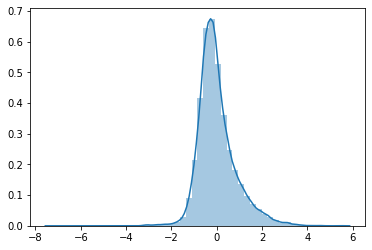

In [25]:
sns.distplot(lin_reg.resid)
plt.show()

In [26]:
#Jarque Bera Test

from scipy import stats

print(stats.jarque_bera(lin_reg.resid))

(9617.514109020074, 0.0)


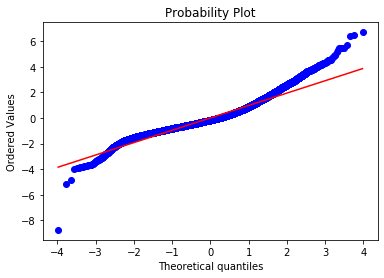

In [27]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

#### Homoscedasticity

In [48]:
#Goldfeld-Quandt test

from statsmodels.compat import lzip
import statsmodels.stats.api as sms
model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 1.042708032180122), ('p-value', 0.018838670387191808)]

#### Independence of Errors(No Autocorrelation)

In [ ]:
Ho:Autocorrelation dosent exists.
Ha:Autocorrelation exists.

In [50]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(lin_reg.resid,lags=31)[1])

0.4811628035870681

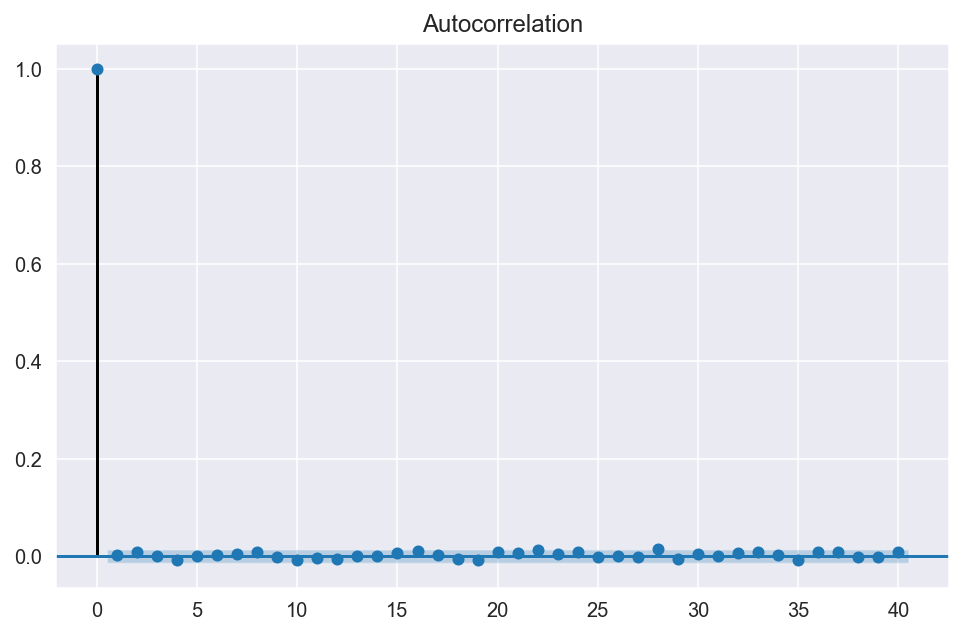

In [52]:
import statsmodels.tsa.api as smt

acf=smt.graphics.plot_acf(lin_reg.resid,lags=40,alpha=0.05)
acf.show()

#### Multicolinaerity

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
vif_values=pd.DataFrame({'vif': vif[1:]}, index=x.columns)
vif_values

,vif
timedelta,2.146923
n_tokens_title,1.160962
n_tokens_content,6.444275
n_unique_tokens,15.509981
n_non_stop_words,5.480709
n_non_stop_unique_tokens,7.113466
num_hrefs,1.839755
num_self_hrefs,1.576203
num_imgs,1.763725
num_videos,1.345673


In [30]:
vif_values[vif_values['vif']>=4]

,vif
n_tokens_content,6.444275
n_unique_tokens,15.509981
n_non_stop_words,5.480709
n_non_stop_unique_tokens,7.113466
data_channel_is_bus,6.059199
data_channel_is_tech,6.901216
data_channel_is_world,7.808368
kw_min_min,4.158249
kw_max_min,10.621141
kw_avg_min,10.853879


In [32]:
vif_values[vif_values['vif']>=6].size

32

### Feature Selection

#### Step Forward Selection

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [33]:
import statsmodels.api as sm

x_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.pvalues

const                            1.862770e-15
timedelta                        7.117100e-02
n_tokens_title                   1.133334e-01
n_tokens_content                 3.741776e-02
n_unique_tokens                  2.511554e-03
n_non_stop_words                 1.862790e-15
n_non_stop_unique_tokens         2.604867e-01
num_hrefs                        1.030455e-19
num_self_hrefs                   3.694378e-06
num_imgs                         3.543340e-07
num_videos                       2.037612e-12
average_token_length             1.574230e-01
num_keywords                     3.338463e-08
data_channel_is_lifestyle        2.686562e-04
data_channel_is_entertainment    1.211224e-25
data_channel_is_bus              8.481862e-10
data_channel_is_socmed           8.131678e-03
data_channel_is_tech             2.616053e-01
data_channel_is_world            5.118622e-05
kw_min_min                       2.783068e-05
kw_max_min                       7.787520e-02
kw_avg_min                       7

In [46]:
lin_reg = LinearRegression()


sfs1 = sfs(lin_reg,k_features =32,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.4s finished

[2020-08-29 10:59:18] Features: 1/32 -- score: 0.013307024561326708[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.6s finished

[2020-08-29 10:59:19] Features: 2/32 -- score: 0.03776202841714802[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.9s finished

[2020-08-29 10:59:20] Features: 3/32 -- score: 0.052790321611300664[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    4.5s finished

[2020-08-29 11:00:44] Features: 28/32 -- score: 0.11232832495388734[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    4.8s finished

[2020-08-29 11:00:49] Features: 29/32 -- score: 0.11231388985032502[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.4s finished

[2020-08-29 11:00:55] Features: 30/32 -- score: 0.11227384146243599[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    5.0s finished

[2020-08-29 11:01:00] Features: 

In [47]:
lin_reg = LinearRegression()


sfs1 = sfs(lin_reg,k_features =48,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.8s finished

[2020-08-29 11:01:06] Features: 1/48 -- score: 0.013307024561326708[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.1s finished

[2020-08-29 11:01:07] Features: 2/48 -- score: 0.03776202841714802[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.2s finished

[2020-08-29 11:01:08] Features: 3/48 -- score: 0.052790321611300664[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    5.1s finished

[2020-08-29 11:02:36] Features: 28/48 -- score: 0.11232832495388734[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    4.9s finished

[2020-08-29 11:02:41] Features: 29/48 -- score: 0.11231388985032502[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.9s finished

[2020-08-29 11:02:46] Features: 30/48 -- score: 0.11227384146243599[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    4.5s finished

[2020-08-29 11:02:51] Features: 

In [48]:
lin_reg = LinearRegression()


sfs1 = sfs(lin_reg,k_features =16,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.5s finished

[2020-08-29 11:04:03] Features: 1/16 -- score: 0.013307024561326708[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.9s finished

[2020-08-29 11:04:04] Features: 2/16 -- score: 0.03776202841714802[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.0s finished

[2020-08-29 11:04:05] Features: 3/16 -- score: 0.052790321611300664[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

In [49]:
lin_reg = LinearRegression()


sfs1 = sfs(lin_reg,k_features =32,forward=True,
           floating=False, scoring='neg_mean_squared_error',
           verbose=2,
           cv=5)

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.5s finished

[2020-08-29 11:04:40] Features: 1/32 -- score: -0.7954194733617659[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.8s finished

[2020-08-29 11:04:41] Features: 2/32 -- score: -0.7765157987462821[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.9s finished

[2020-08-29 11:04:42] Features: 3/32 -- score: -0.7646830763490249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    5.2s finished

[2020-08-29 11:06:14] Features: 28/32 -- score: -0.716798034838907[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    4.8s finished

[2020-08-29 11:06:19] Features: 29/32 -- score: -0.7167966520689543[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.6s finished

[2020-08-29 11:06:23] Features: 30/32 -- score: -0.7168090250885475[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    5.0s finished

[2020-08-29 11:06:29] Features: 3

In [50]:
lin_reg = LinearRegression()


sfs1 = sfs(lin_reg,k_features =48,forward=True,
           floating=False, scoring='neg_mean_squared_error',
           verbose=2,
           cv=5)

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.6s finished

[2020-08-29 11:06:34] Features: 1/48 -- score: -0.7954194733617659[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.0s finished

[2020-08-29 11:06:35] Features: 2/48 -- score: -0.7765157987462821[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.1s finished

[2020-08-29 11:06:37] Features: 3/48 -- score: -0.7646830763490249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    6.7s finished

[2020-08-29 11:08:10] Features: 28/48 -- score: -0.716798034838907[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    5.5s finished

[2020-08-29 11:08:15] Features: 29/48 -- score: -0.7167966520689543[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.5s finished

[2020-08-29 11:08:21] Features: 30/48 -- score: -0.7168090250885475[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    5.1s finished

[2020-08-29 11:08:26] Features: 3

In [51]:
clf = LinearRegression()


sfs1 = sfs(clf,k_features =16,forward=True,
           floating=False, scoring='neg_mean_squared_error',
           verbose=2,
           cv=5)

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.9s finished

[2020-08-29 11:09:51] Features: 1/16 -- score: -0.7954194733617659[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.4s finished

[2020-08-29 11:09:53] Features: 2/16 -- score: -0.7765157987462821[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.8s finished

[2020-08-29 11:09:55] Features: 3/16 -- score: -0.7646830763490249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

#### Backward Elimination

In [53]:
x_cons = sm.add_constant(x)
model = sm.OLS(y,x_cons).fit()
model.pvalues

const                            1.862770e-15
timedelta                        7.117100e-02
n_tokens_title                   1.133334e-01
n_tokens_content                 3.741776e-02
n_unique_tokens                  2.511554e-03
n_non_stop_words                 1.862790e-15
n_non_stop_unique_tokens         2.604867e-01
num_hrefs                        1.030455e-19
num_self_hrefs                   3.694378e-06
num_imgs                         3.543340e-07
num_videos                       2.037612e-12
average_token_length             1.574230e-01
num_keywords                     3.338463e-08
data_channel_is_lifestyle        2.686562e-04
data_channel_is_entertainment    1.211224e-25
data_channel_is_bus              8.481862e-10
data_channel_is_socmed           8.131678e-03
data_channel_is_tech             2.616053e-01
data_channel_is_world            5.118622e-05
kw_min_min                       2.783068e-05
kw_max_min                       7.787520e-02
kw_avg_min                       7

In [57]:

cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x_cons = x[cols]
    x_cons = sm.add_constant(x_cons)
    model = sm.OLS(y,x_cons).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_world', 'kw_min_min', 'kw_min_max', 'kw_min_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'rate_positive_words', 'rate_negative_words', 'min_positive_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity']


In [60]:
lis=['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 
     'num_videos', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 
     'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_world', 
     'kw_min_min', 'kw_min_max', 'kw_min_avg', 'kw_avg_avg', 
     'self_reference_min_shares', 'self_reference_avg_sharess', 
     'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 
     'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 
     'LDA_00', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 
     'rate_positive_words', 'rate_negative_words', 'min_positive_polarity', 
     'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity']

len(lis)

39

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:17:38   Log-Likelihood:                -35172.
No. Observations:               28389   AIC:                         7.042e+04
Df Residuals:                   28352   BIC:                         7.072e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2.509e+07   2.77e+06      9.043      0.000    1.97e+07    3.05e+07
n_tokens_content                  0.0049      0.001      3.410      0.001       0.002       0.008
n_unique_tokens                  -0.5975      0.126     -4.724      0.000      -0.845      -0.350
n_non_stop_words              -4.207e+07   4.65e+06     -9.043      0.000   -5.12e+07    -3.3e+07
num_hrefs                         0.0817      0.009      9.088      0.000       0.064       0.099
num_self_hrefs                   -0.0423      0.008     -5.017      0.000      -0.059      -0.026
num_imgs                          0.0316      0.007      4.733      0.000       0.018       0.045
num_videos                        0.0454      0.006      7.275      0.000       0.033       0.058
num_keywords                      0.0162      0.003      5.501      0.000       0.010       0.022
data_channel_is_lifestyle        -0.1539      0.023     -6.654      0.000      -0.199      -0.109
data_channel_is_entertainment    -0.2712      0.020    -13.599      0.000      -0.310      -0.232
data_channel_is_bus              -0.2269      0.025     -9.113      0.000      -0.276      -0.178
data_channel_is_socmed            0.0602      0.026      2.311      0.021       0.009       0.111
data_channel_is_world            -0.1633      0.023     -7.149      0.000      -0.208      -0.119
kw_min_min                        0.0006   7.42e-05      8.702      0.000       0.001       0.001
kw_min_max                       -0.0579      0.003    -18.111      0.000      -0.064      -0.052
kw_min_avg                        0.0003   1.34e-05     19.515      0.000       0.000       0.000
kw_avg_avg                        0.1884      0.012     15.374      0.000       0.164       0.212
self_reference_min_shares         0.0014      0.000      7.258      0.000       0.001       0.002
self_reference_avg_sharess        0.0011      0.000      7.013      0.000       0.001       0.001
weekday_is_monday              4.428e+06    4.9e+05      9.043      0.000    3.47e+06    5.39e+06
weekday_is_tuesday             4.428e+06    4.9e+05      9.043      0.000    3.47e+06    5.39e+06
weekday_is_wednesday           4.428e+06    4.9e+05      9.043      0.000    3.47e+06    5.39e+06
weekday_is_thursday            4.428e+06    4.9e+05      9.043      0.000    3.47e+06    5.39e+06
weekday_is_friday              4.428e+06    4.9e+05      9.043      0.000    3.47e+06    5.39e+06
weekday_is_saturday            1.476e+06   1.63e+05      9.043      0.000    1.16e+06     1.8e+06
weekday_is_sunday              1.476e+06   1.63e+05      9.043      0.000    1.16e+06     1.8e+06
is_weekend                     2.952e+06   3.26e+05      9.043      0.000    2.31e+06    3.59e+06
LDA_00                            0.2975     

#### Recursive Feature Elimination

In [95]:
#no of features
nof_list=np.arange(1,60)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 55
Score with 55 features: 0.136326


In [96]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 55)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_min_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_ne

### Regularization

#### Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

In [144]:
ridge = Ridge(alpha=1)

In [145]:
ridge.fit(x,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [146]:
Ridge_train_score = ridge.score(x_train,y_train)
Ridge_test_score = ridge.score(x_test, y_test)
print("ridge regression train score :", Ridge_train_score)
print("ridge regression test score :", Ridge_test_score)

ridge regression train score : 0.14310754614253107
ridge regression test score : 0.14302427485936953


In [147]:
y_pred_train=ridge.predict(x_train)
y_pred_test=ridge.predict(x_test)

In [148]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.6951789237408728
MSE Of test: 0.7080422386525382


In [164]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
params = {'alpha':randint(1,100)}

randcv_rid = RandomizedSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
randcv_rid.fit(x,y)
print(randcv_rid.best_params_,randcv_rid.best_score_)

{'alpha': 3} -0.9641556723961875


In [165]:
ridge = Ridge(alpha=3)
ridge.fit(x,y)
Ridge_train_score = ridge.score(x_train,y_train)
Ridge_test_score = ridge.score(x_test, y_test)
print("ridge regression train score :", Ridge_train_score)
print("ridge regression test score :", Ridge_test_score)

ridge regression train score : 0.14310731846952096
ridge regression test score : 0.14301371166805288


In [166]:
y_pred_train=ridge.predict(x_train)
y_pred_test=ridge.predict(x_test)

In [167]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.6951791084472235
MSE Of test: 0.7080509660708393


#### Lasso

In [181]:
from sklearn.linear_model import Lasso

In [182]:
lasso=Lasso()

In [183]:
lasso.fit(x,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [184]:
lasso_train_score=lasso.score(x_train,y_train)
lasso_test_score=lasso.score(x_test, y_test)

In [185]:
print("Lasso regression train score :", lasso_train_score)
print("Lasso regression test score :", lasso_test_score)

Lasso regression train score : 0.05011979459738081
Lasso regression test score : 0.05042527503246341


In [186]:
y_pred_train=lasso.predict(x_train)
y_pred_test=lasso.predict(x_test)

In [187]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.7706179414953618
MSE Of test: 0.7845484933934989


In [188]:
params = {'alpha':randint(1,100)}

randcv_rid = RandomizedSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
randcv_rid.fit(x,y)
print(randcv_rid.best_params_,randcv_rid.best_score_)

{'alpha': 44} -0.861921453634854


In [190]:
lasso = Ridge(alpha=44)
lasso.fit(x,y)
Lasso_train_score = lasso.score(x_train,y_train)
Lasso_test_score = lasso.score(x_test, y_test)
print("Lasso regression train score :",Lasso_train_score)
print("Lasso regression test score :", Lasso_test_score)

Lasso regression train score : 0.14292074527050458
Lasso regression test score : 0.1427771396543972


In [191]:
y_pred_train=lasso.predict(x_train)
y_pred_test=lasso.predict(x_test)

In [192]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.695330471380935
MSE Of test: 0.7082464243238998


#### Elastic Net Regression 

In [193]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

In [194]:
elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [195]:
elastic.fit(x,y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [196]:
print('Optimal alpha: %.8f'%elastic.alpha_)
print('Optimal l1_ratio: %.3f'%elastic.l1_ratio_)
print('Number of iterations %d'%elastic.n_iter_)

Optimal alpha: 0.00025755
Optimal l1_ratio: 0.900
Number of iterations 10


In [ ]:
elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [198]:
elastic = ElasticNet(l1_ratio=elastic.l1_ratio_, alpha = elastic.alpha_, max_iter=elastic.n_iter_, fit_intercept=True, normalize = True)
elastic.fit(x,y)

ElasticNet(alpha=0.0002575456224489299, copy_X=True, fit_intercept=True,
           l1_ratio=0.9, max_iter=10, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [199]:
elastic_train_score=elastic.score(x_train,y_train)
elastic_test_score=elastic.score(x_test, y_test)

In [200]:
print("Elastic Net regression train score :", elastic_train_score)
print("Elastic Net test score :", elastic_test_score)

Elastic Net regression train score : 0.09112276034641231
Elastic Net test score : 0.08924231172275843


In [201]:
y_pred_train=elastic.predict(x_train)
y_pred_test=elastic.predict(x_test)

In [202]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.7373530930639425
MSE Of test: 0.7524774547983928


## Non-Linear Models

#### Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [243]:
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [244]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [245]:
rf_train_score=rf.score(x_train,y_train)
rf_test_score=rf.score(x_test, y_test)

print("Random Forest regressor train score :", rf_train_score)
print("Random Forest regression test score :", rf_test_score)

Random Forest regressor train score : 0.8380694906337763
Random Forest regression test score : 0.0648775976498398


In [246]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.1313708350625143
MSE Of test: 0.7726078344465297


In [236]:
import scipy.stats as stats
rfr=RandomForestRegressor()



random=RandomizedSearchCV(rfr,{'max_depth':range(1,16),
                         'min_samples_split':range(2,16),
                         'min_samples_leaf':range(1,16),
                         'max_features':['auto','sqrt','log2']},cv=5)
random.fit(x,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [237]:
random.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 7}

In [247]:
rfr=RandomForestRegressor(**random.best_params_)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [248]:
y_pred_train=rfr.predict(x_train)
y_pred_test=rfr.predict(x_test)

In [249]:
rf_train_score=rfr.score(x_train,y_train)
rf_test_score=rfr.score(x_test, y_test)

print("Random Forest regressor train score :", rf_train_score)
print("Random Forest regression test score :", rf_test_score)

Random Forest regressor train score : 0.18553877005506048
Random Forest regression test score : 0.13184684223769072


In [250]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.6607553593370408
MSE Of test: 0.7172771494950159


#### Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [270]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [271]:
y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)

In [272]:
dt_train_score=dt.score(x_train,y_train)
dt_test_score=dt.score(x_test, y_test)

print("Decision Tree regressor train score :", dt_train_score)
print("Decision Tree regression test score :", dt_test_score)

Decision Tree regressor train score : 1.0
Decision Tree regression test score : -0.7505797484393166


In [273]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 9.884579579309176e-33
MSE Of test: 1.4463471574079538


In [274]:
from sklearn.model_selection import cross_val_score,KFold

dtr = DecisionTreeRegressor(random_state=42)

params = {'max_depth':np.arange(2,20),'min_samples_split':np.arange(2,20),
          'max_leaf_nodes':np.arange(2,20),'max_features':['auto','sqrt','log2']}

randcv_dtr = RandomizedSearchCV(dtr,params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,return_train_score=True)

randcv_dtr.fit(x,y)

print('best parameter :' ,randcv_dtr.best_params_,
      '\n','best_score :',randcv_dtr.best_score_)

best parameter : {'min_samples_split': 10, 'max_leaf_nodes': 18, 'max_features': 'auto', 'max_depth': 17} 
 best_score : -0.7432033199759313


In [278]:
dtr=DecisionTreeRegressor(**randcv_dtr.best_params_)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=17, max_features='auto',
                      max_leaf_nodes=18, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [279]:
y_pred_train=dtr.predict(x_train)
y_pred_test=dtr.predict(x_test)

In [280]:
dtr_train_score=dtr.score(x_train,y_train)
dtr_test_score=dtr.score(x_test, y_test)

print("Decision Tree regressor train score :", dtr_train_score)
print("Decision Tree regression test score :", dtr_test_score)

Decision Tree regressor train score : 0.13355333114770274
Decision Tree regression test score : 0.11049259668915201


In [281]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.7029300585155972
MSE Of test: 0.7349202488026914


#### KNN Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [283]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [284]:
y_train_pred=knr.predict(x_train)
y_test_pred=knr.predict(x_test)

In [286]:
knn_train_score=knr.score(x_train,y_train)
knn_test_score=knr.score(x_test, y_test)

print("KNN regressor train score :", knn_train_score)
print("KNN regression test score :", knn_test_score)

KNN regressor train score : 0.25622562112876224
KNN regression test score : -0.1072910549466095


In [287]:
print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.7029300585155972
MSE Of test: 0.7349202488026914


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

knr=KNeighborsRegressor()

params={
    'n_neighbors':randint(50,10000),
     'weights':['uniform','distance'],
     'leaf_size':randint(50,10000),
     'p':[1,2]
     
   }

rsearch=RandomizedSearchCV(knr,params,cv=15,scoring='neg_mean_squared_error',n_jobs=-1, 
                           random_state=42,n_iter=1000)
rsearch.fit(x,y)
rsearch.best_params_



In [293]:
knr=KNeighborsRegressor(**rsearch.best_params_)
#knr=KNeighborsRegressor(leaf_size=2116, n_neighbors=72, p=1, weights='distance')
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=2116, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=72, p=1,
                    weights='distance')

In [294]:
y_train_pred=knr.predict(x_train)
y_test_pred=knr.predict(x_test)

In [295]:
knn_train_score=knr.score(x_train,y_train)
knn_test_score=knr.score(x_test, y_test)

print("KNN regressor train score :", knn_train_score)
print("KNN regression test score :", knn_test_score)

KNN regressor train score : 1.0
KNN regression test score : 0.032467498877653655


In [296]:
from sklearn.metrics import mean_squared_error,r2_score

print(mean_squared_error(y_train_pred,y_train))
print(mean_squared_error(y_test_pred,y_test))


0.0
0.7993853944361581


#### Ada Boost Regressor

In [26]:
from sklearn.ensemble import AdaBoostRegressor

In [27]:
abr=AdaBoostRegressor(random_state=42)
abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=42)

In [28]:
y_train_pred=abr.predict(x_train)
y_test_pred=abr.predict(x_test)

In [29]:
aboost_train_score=abr.score(x_train,y_train)
aboost_test_score=abr.score(x_test, y_test)

print("Ada Boost regressor train score :", aboost_train_score)
print("Ada Boost regression test score :", aboost_test_score)

Ada Boost regressor train score : -0.17922682564937298
Ada Boost regression test score : -0.196059503605573


In [31]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.9566820571367219
MSE Of test: 0.9881967757669715


In [34]:
lnr=LinearRegression()
rfr=RandomForestRegressor()
dr=DecisionTreeRegressor()
ridge=Ridge()



In [313]:
ada=AdaBoostRegressor()

params={
    'base_estimator':[lnr,ridge,dr,rfr],
    'n_estimators':randint(1,20),
    'loss':['linear', 'square', 'exponential']
     
     
   }

rsearch=RandomizedSearchCV(ada,params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1, 
                           random_state=42)
rsearch.fit(x,y)
print(rsearch.best_params_)
print(rsearch.best_score_)

{'base_estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False), 'loss': 'exponential', 'n_estimators': 15}
-0.7471828548665979


In [36]:
ada=AdaBoostRegressor(base_estimator=rfr,loss='exponential',n_estimators=15,random_state=42)
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators='warn',
                                                       n_jobs=None,
                                                       oob_score=False,
                    

In [37]:
y_train_pred=ada.predict(x_train)
y_test_pred=ada.predict(x_test)

In [38]:
adab_train_score=ada.score(x_train,y_train)
adab_test_score=ada.score(x_test, y_test)

print("Ada Boost regressor train score :", adab_train_score)
print("Ada Boost regression test score :", adab_test_score)

Ada Boost regressor train score : 0.928399363307318
Ada Boost regression test score : 0.16255939754499737


In [42]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.058088098840300056
MSE Of test: 0.6919021175348553


#### Bagging Regressor

In [43]:
from sklearn.ensemble import BaggingRegressor

In [44]:
bag=BaggingRegressor(random_state=42)
bag.fit(x_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [45]:
y_train_pred=bag.predict(x_train)
y_test_pred=bag.predict(x_test)

In [46]:
bag_train_score=bag.score(x_train,y_train)
bag_test_score=bag.score(x_test, y_test)

print("Bagging regressor train score :", bag_train_score)
print("Bagging regressor test score :", bag_test_score)

Bagging regressor train score : 0.8372560526650072
Bagging regressor test score : 0.07018283099095368


In [48]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.13203076027146346
MSE Of test: 0.7682245955971446


In [317]:
br=BaggingRegressor()

params={
    'base_estimator':[lnr,ridge,dr,rfr],
    'n_estimators':randint(1,20)
     
     
   }

rsearch=RandomizedSearchCV(br,params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1, 
                           random_state=42)
rsearch.fit(x,y)
print(rsearch.best_params_)
print(rsearch.best_score_)

{'base_estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False), 'n_estimators': 12}
-0.7395400469400714


In [49]:
br=BaggingRegressor(base_estimator=rfr,random_state=42)
br.fit(x_train,y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators='warn',
                                                      n_jobs=None,
                                                      oob_score=False,
                                 

In [50]:
y_train_pred=br.predict(x_train)
y_test_pred=br.predict(x_test)

In [51]:
br_train_score=br.score(x_train,y_train)
br_test_score=br.score(x_test, y_test)

print("Bagging regressor train score :", br_train_score)
print("Bagging regression test score :", br_test_score)

Bagging regressor train score : 0.6902806607020606
Bagging regression test score : 0.1661895895577672


In [ ]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

#### Gradient Boosting Regresssor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
grad=GradientBoostingRegressor(random_state=42)
grad.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
y_train_pred=grad.predict(x_train)
y_test_pred=grad.predict(x_test)

In [56]:
gradb_train_score=grad.score(x_train,y_train)
gradb_test_score=grad.score(x_test, y_test)

print("Gradient Boosting regressor train score :", gradb_train_score)
print("Gradient Boosing regressor test score :", gradb_test_score)

Gradient Boosting regressor train score : 0.23379463693752245
Gradient Boosing regressor test score : 0.1770416876673263


In [57]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))


MSE Of train: 0.6216063839288472
MSE Of test: 0.6799366991242619


#### XG Boost

In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
import xgboost as xgb

In [36]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [37]:
y_train_pred=xg_reg.predict(x_train)
y_test_pred=xg_reg.predict(x_test)

In [38]:
xgreg_train_score=xg_reg.score(x_train,y_train)
xgreg_test_score=xg_reg.score(x_test, y_test)

print("XG bsting regressor train score :", xgreg_train_score)
print("XG boosing regressor test score :", xgreg_test_score)

XG bsting regressor train score : 0.6557322496906512
XG boosing regressor test score : 0.12291828033169272


In [39]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))


MSE Of train: 0.2792972245949467
MSE Of test: 0.7246540200111944


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import random
import scipy.stats as st

xg_boost=xgb.XGBRegressor()



params = { 'n_estimators': st.randint(0,200),
           'max_depth': st.randint(0,50),
           'learning_rate': st.uniform(0,1),
           'gamma':st.uniform(0,1),
           'reg_alpha':st.uniform(0,1),
            'reg_lambda':st.uniform(0,1),
           'colsample_bytree':st.uniform(0,1) }
    


rsearch=RandomizedSearchCV(xg_boost,params,cv=7,random_state=42,n_jobs=1,
                           scoring='neg_mean_squared_error',n_iter=100)

rsearch.fit(x,y)
rsearch.best_params_


In [2]:
 colsample_bytree= 0.4148195023376652,
 gamma= 0.27340707193070624,
 learning_rate= 0.056375496650927115,
 max_depth= 5,
 n_estimators= 196,
 reg_alpha= 0.9997176732861306,
 reg_lambda= 0.9966368370739054


In [68]:
y_train_pred=xg_reg.predict(x_train)
y_test_pred=xg_reg.predict(x_test)

In [69]:
xgreg_train_score=xg_reg.score(x_train,y_train)
xgreg_test_score=xg_reg.score(x_test, y_test)

print("XG bsting regressor train score :", xgreg_train_score)
print("XG boosing regressor test score :", xgreg_test_score)

XG bsting regressor train score : 0.3490827700286653
XG boosing regressor test score : 0.19241125491013789


In [70]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))


MSE Of train: 0.5280755330949964
MSE Of test: 0.6672382031476866


In [26]:
from xgboost import XGBRegressor

In [40]:
df_xgb=df=pd.read_csv('OnlineNewsPopularity.csv')
df_xgb.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [41]:
df_xgb=df_xgb.drop(df_xgb.iloc[:,0:2],axis=1)
df_xgb.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [42]:
df_xgb.shape

(39644, 59)

In [51]:
xgb = XGBRegressor()
xgb.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [52]:
print(xgb.feature_importances_)

[0.0111535  0.00627071 0.01123301 0.01441276 0.         0.01139134
 0.01775382 0.01734087 0.01654844 0.01812116 0.01259883 0.01081566
 0.01516402 0.04993907 0.00571247 0.02749081 0.05961827 0.00435486
 0.00391733 0.01138267 0.01192267 0.01349336 0.01120063 0.01462134
 0.01791603 0.01783844 0.0662054  0.02493455 0.0124134  0.05108299
 0.01269742 0.01053656 0.01600905 0.01134625 0.01690304 0.01655854
 0.01231874 0.06244938 0.01638185 0.01470291 0.016522   0.01474911
 0.01285326 0.01370852 0.01239102 0.01266929 0.0122453  0.01348477
 0.         0.01326112 0.01386104 0.01328172 0.01138074 0.01359862
 0.01264698 0.01085022 0.0167217  0.01194075 0.01708165]


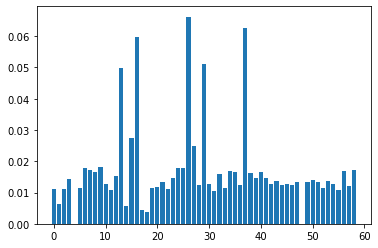

In [53]:
# plot
plt.bar(range(len(xgb.feature_importances_)),xgb.feature_importances_)
plt.show()

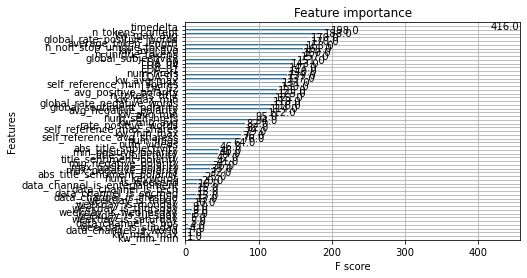

<Figure size 720000x720000 with 0 Axes>

In [57]:
# plot feature importance

from xgboost import plot_importance
plot_importance(xgb)
fig = plt.figure(figsize = (10000,10000))
plt.show()

#### Light GBM Regressor

In [72]:
import lightgbm as lgb

In [73]:
gbm=lgb.LGBMRegressor()
gbm.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [74]:
y_train_pred=gbm.predict(x_train)
y_test_pred=gbm.predict(x_test)

In [75]:
lgbm_train_score=gbm.score(x_train,y_train)
lgbm_test_score=gbm.score(x_test, y_test)

print("LGBM regressor train score :", lgbm_train_score)
print("LGBM regressor test score :", lgbm_test_score)

LGBM regressor train score : 0.4077764748513514
LGBM regressor test score : 0.184790794680454


In [76]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.4804585580996883
MSE Of test: 0.6735343064821218


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import random
import scipy.stats as st

gbm=lgb.LGBMRegressor()

params={
    'num_leaves':randint(0,100),
    'max_depth':randint(0,20),
    'learning_rate': st.uniform(0,1),
    'n_estimators':randint(0,200),
    'reg_alpha':st.uniform(0,1),
    'reg_lambda':st.uniform(0,1) }

rsearch1=RandomizedSearchCV(gbm,params,cv=7,random_state=42,scoring='neg_mean_squared_error',n_jobs=1)

rsearch1.fit(x,y)
rsearch1.best_params_

###### LGBM Boosting Type=default

In [77]:
gbm1=lgb.LGBMRegressor(learning_rate= 0.056411579027100256,
 max_depth= 11,
 n_estimators= 157,
 num_leaves= 37,
 reg_alpha=0.0007787658410143283,
 reg_lambda= 0.9922115592912175)

gbm1.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.056411579027100256,
              max_depth=11, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=157, n_jobs=-1, num_leaves=37,
              objective=None, random_state=None,
              reg_alpha=0.0007787658410143283, reg_lambda=0.9922115592912175,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [93]:
y_train_pred=gbm1.predict(x_train)
y_test_pred=gbm1.predict(x_test)

In [79]:
lgbm_train_score=gbm1.score(x_train,y_train)
lgbm_test_score=gbm1.score(x_test, y_test)

print("LGBM regressor train score :", lgbm_train_score)
print("LGBM regressor test score :", lgbm_test_score)

LGBM regressor train score : 0.41739381468227943
LGBM regressor test score : 0.18888588246901705


In [80]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.47265621146585174
MSE Of test: 0.6701509024483412


###### LGBM Boosting Type=dart

In [85]:
gbm2=lgb.LGBMRegressor(boosting_type='dart',
                      learning_rate= 0.7553614103176525,
 max_depth= 5,
 n_estimators= 53,
 num_leaves= 3,
 reg_alpha= 0.18485445552552704,
 reg_lambda= 0.9695846277645586)

gbm2.fit(x_train,y_train)

LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.7553614103176525,
              max_depth=5, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=53, n_jobs=-1, num_leaves=3,
              objective=None, random_state=None, reg_alpha=0.18485445552552704,
              reg_lambda=0.9695846277645586, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [86]:
y_train_pred=gbm2.predict(x_train)
y_test_pred=gbm2.predict(x_test)

In [87]:
lgbm_train_score=gbm2.score(x_train,y_train)
lgbm_test_score=gbm2.score(x_test, y_test)

print("LGBM regressor train score :", lgbm_train_score)
print("LGBM regressor test score :", lgbm_test_score)

LGBM regressor train score : 0.19493952526775848
LGBM regressor test score : 0.15925183996720038


In [88]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.653128723273559
MSE Of test: 0.6946348559347337


###### LGBM Boosting Type =Goss

In [89]:
gbm3=lgb.LGBMRegressor(boosting_type='goss',
                       learning_rate= 0.04666566321361543,
 max_depth= 15,
 n_estimators= 14,
 num_leaves= 61,
 reg_alpha= 0.0906064345328208,
 reg_lambda= 0.6183860093330873)
                      
gbm3.fit(x_train,y_train)

LGBMRegressor(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.04666566321361543,
              max_depth=15, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=14, n_jobs=-1, num_leaves=61,
              objective=None, random_state=None, reg_alpha=0.0906064345328208,
              reg_lambda=0.6183860093330873, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [90]:
y_train_pred=gbm3.predict(x_train)
y_test_pred=gbm3.predict(x_test)

In [91]:
lgbm_train_score=gbm3.score(x_train,y_train)
lgbm_test_score=gbm3.score(x_test, y_test)

print("LGBM regressor train score :", lgbm_train_score)
print("LGBM regressor test score :", lgbm_test_score)

LGBM regressor train score : 0.14904412509160236
LGBM regressor test score : 0.1090464043194952


In [94]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.47265621146585174
MSE Of test: 0.6701509024483412


### Comparison Algorithm